In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Punto 1

In [2]:
from pathlib import Path
Path('my_data.db').touch()

In [3]:
import sqlite3
conn = sqlite3.connect('my_data.db')
c = conn.cursor()

## Punto 2

In [ ]:
c.execute('''CREATE TABLE big_bang_theory (Location text, Scene text, Text text, Speaker text, Season int)''')

In [5]:
big_bang_df = pd.read_csv('big_bang_theory_dataset.csv', usecols=['Location', 'Scene', 'Text', 'Speaker', 'Season'])
# write the data to a sqlite table
big_bang_df.to_sql('big_bang_theory', conn, if_exists='append', index = False)

38918

In [6]:
c.execute('''SELECT * FROM big_bang_theory LIMIT 5''').fetchall() #

[('The apartment', None, 'Again I’m right here.', 'Leonard', 3),
 ('The apartment',
  None,
  'Fine. The record shall so reflect. Now getting back to the problem at hand what to do with a washed-up experimental physicist.',
  'Sheldon',
  5),
 ('The room in the basement',
  ' Sheldon enters, takes out a box, takes a beanbag from the box, then starts playing keepie-uppie,',
  'One two three four five six seven eight… Drat. I’m never going to get to forty-three again. One two three four… Rats.',
  'Sheldon',
  6),
 ('Sheldon and Amy’s bedroom',
  None,
  'I’m not sure. Earlier tonight things began organically and now it’s feeling forced like all the Pirates of the Caribbean sequels.',
  'Sheldon',
  10),
 ('A cinema', None, 'He’s finding the acoustic sweet spot.', 'Leonard', 2)]

In [7]:
values = {"Text": ""}
big_bang_df = big_bang_df.fillna(value=values)

## Punto 3

In [8]:
big_bang_df.loc[(big_bang_df.Speaker == "Sheldon") & (big_bang_df['Text'].str.contains("Penny"))]

,Location,Scene,Text,Speaker,Season
35,Penny’s car,NaN,Because he’s not like us Penny. We’re dreamers.,Sheldon,7
47,Penny’s door,NaN,Penny.,Sheldon,4
125,Sheldon and Amy’s apartment,NaN,This isn’t fair. You’ve discussed aspects of o...,Sheldon,10
185,The apartment,NaN,Penny please we’re facing a far more serious p...,Sheldon,2
503,Penny’s apartment,Sheldon and Leonard are trying to construct f...,Hang on Penny. How about fans here and here?,Sheldon,1
...,...,...,...,...,...
38332,The following morning,"Sheldon is in the kitchen making breakfast, H...",Well then it’s all settled Christie will stay ...,Sheldon,1
38424,Amy’s apartment,"Amy is playing a harp,",Penny has dragged a chair in off the street wh...,Sheldon,5
38590,The living room,"Leonard enters in his dressing gown, There is...",But we did convince him to leave the motel. Co...,Sheldon,1
38708,Penny’s apartment,NaN,Penny!,Sheldon,5


In [9]:
big_bang_df.loc[(big_bang_df.Speaker == "Sheldon") & (big_bang_df.Text == "Penny.")]

,Location,Scene,Text,Speaker,Season
1722,The stairs,Sheldon is playing on his computer at the end...,Penny.,Sheldon,2
2477,Penny’s apartment,NaN,Penny.,Sheldon,2
13029,At Penny’s door,"Leonard knocks three times,",Penny.,Sheldon,4
16842,Outside Penny’s door,NaN,Penny.,Sheldon,2
26974,Penny’s apartment,NaN,Penny.,Sheldon,2
36322,Penny’s apartment door,"Sheldon knocks three times,",Penny.,Sheldon,5


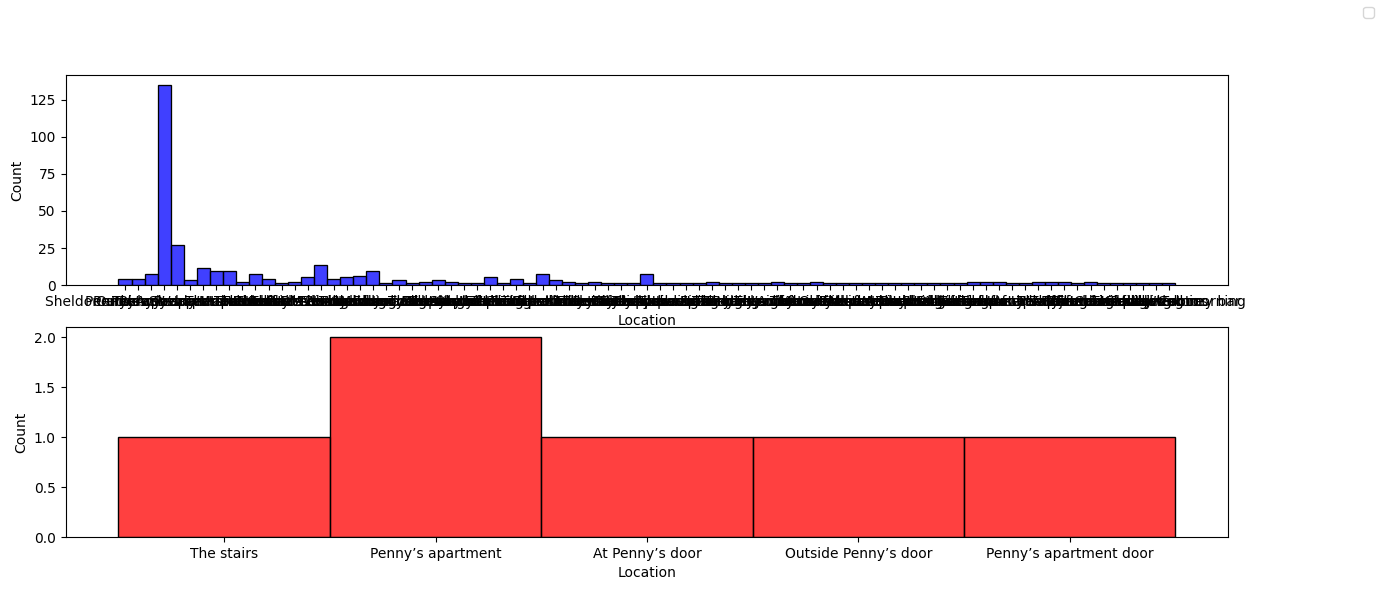

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6))

sns.histplot(data = big_bang_df.loc[(big_bang_df.Speaker == "Sheldon") & (big_bang_df.Text.str.contains("Penny.", case=False))], 
             x="Location", 
             ax=axs[0], 
             color = "blue"
            )
sns.histplot(data = big_bang_df.loc[(big_bang_df.Speaker == "Sheldon") & (big_bang_df.Text == "Penny.")],
            x="Location", 
            ax=axs[1], 
            color = "red"
            )

lines = []
labels = []

for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

fig.legend(lines, labels, loc = 'upper right')

plt.show()

## Punto 4

In [11]:
#create pivot table
df_pivot = pd.pivot_table(big_bang_df[~big_bang_df.Scene.isnull()], values='Scene', index='Location', columns='Speaker',
                          aggfunc='count')
df_pivot

Speaker,Howard,Leonard,Penny,Raj,Sheldon
Location,,,,,
A Korean ballroom dancing club,NaN,NaN,2.0,NaN,NaN
A corridor at the conference,3.0,6.0,6.0,NaN,NaN
A corridor in the basement,6.0,NaN,NaN,6.0,NaN
A corridor in the university,1.0,4.0,NaN,2.0,1.0
A dance video game where the characters are imperial stormtroopers from Star Wars and Bobba Fett,3.0,3.0,NaN,4.0,7.0
...,...,...,...,...,...
The telescope lab,NaN,NaN,NaN,1.0,NaN
The top model house,4.0,NaN,NaN,1.0,NaN
The university cafeteria,23.0,33.0,NaN,22.0,42.0


<AxesSubplot: xlabel='Speaker', ylabel='Location'>

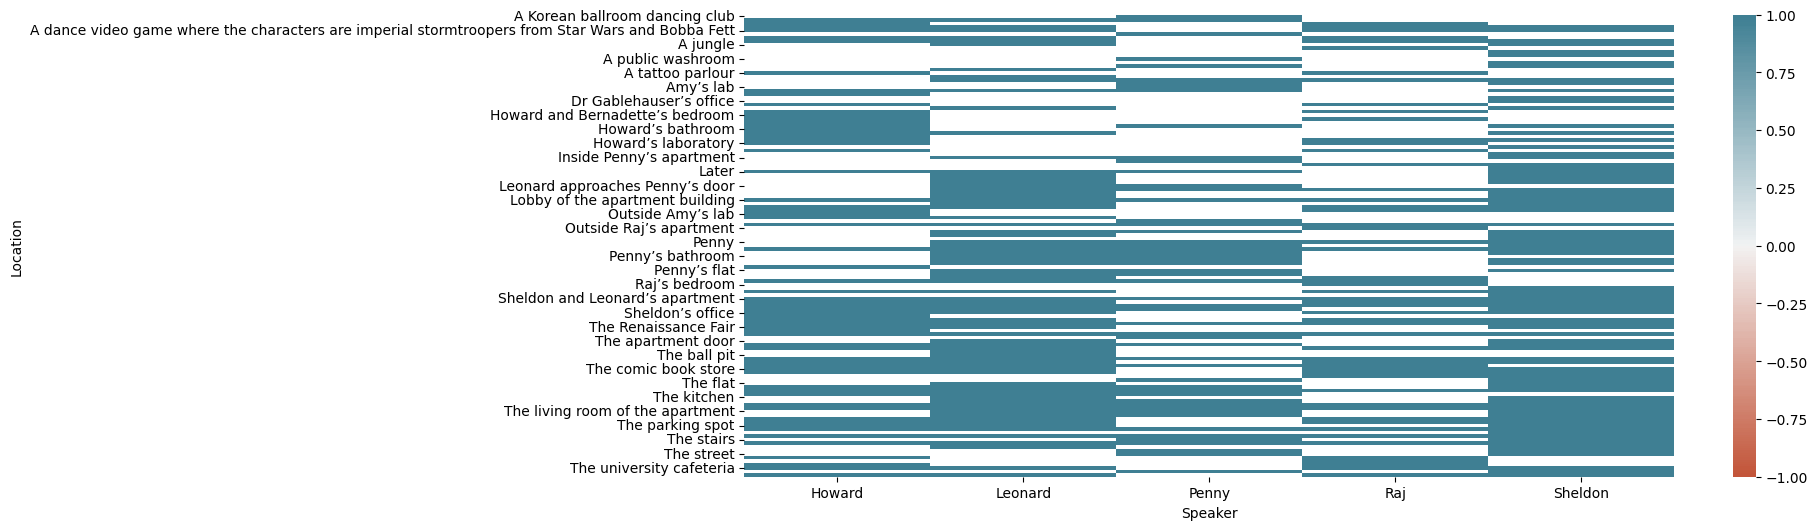

In [12]:
fig, axs = plt.subplots(figsize=(15, 6))

sns.heatmap(
    df_pivot, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
    )

# Punto 5

In [34]:
big_bang_df["said_panny"] = [1 if "Penny" in x[2] else 0 for x in big_bang_df.values]

In [35]:
big_bang_df.said_panny.value_counts()

0    38068
1      850
Name: said_panny, dtype: int64

In [95]:
big_bang_df_2 = big_bang_df.groupby(['Season','Speaker']).said_panny.agg(['sum']).reset_index()
#big_bang_df_2["indice"] = big_bang_df_2.groupby(['Season','Speaker','sum']).ngroup()
big_bang_df_2["indice"] = big_bang_df_2.groupby(['Speaker']).ngroup()
big_bang_df_2["veces_Penny"] = big_bang_df_2["sum"]
big_bang_df_2 = big_bang_df_2[['Season','Speaker','veces_Penny','indice']]

In [96]:
big_bang_df_2.head(20)

,Season,Speaker,veces_Penny,indice
0,1,Howard,6,0
1,1,Leonard,62,1
2,1,Penny,5,2
3,1,Raj,6,3
4,1,Sheldon,40,4
5,2,Howard,8,0
6,2,Leonard,56,1
7,2,Penny,9,2
8,2,Raj,8,3
9,2,Sheldon,73,4


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [175]:
x_train, x_test, y_train, y_test = train_test_split(big_bang_df_2.indice, big_bang_df_2.veces_Penny, test_size=0.20, random_state=0)

In [176]:
logisticRegr = LogisticRegression()

In [177]:
logisticRegr.fit(x_train.values.reshape(-1,1), y_train)

LogisticRegression()

In [178]:
predictions = logisticRegr.predict(x_test.values.reshape(-1,1))

In [179]:
# Score method to get accuracy of model
score = logisticRegr.score(x_test.values.reshape(-1,1), y_test)
print(score)

0.1


In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [181]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]]


El acurracy y los resultados del modelo son muy malos, ya que el modelo tiene muy pocos registros para conseguir un modelo que se ajuste a la variable dependiente

# JUST A QUICK VIEW OF THE GOD MODE

In [183]:
from sklearn.preprocessing import OneHotEncoder

In [184]:
ohe = OneHotEncoder()

In [185]:
transformed = ohe.fit_transform(big_bang_df[['Speaker']])

In [186]:
print(transformed.toarray())

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
